In [15]:
import cv2
import numpy as np
import imutils
import os
import shutil
from matplotlib import pyplot as plt
from scipy import ndimage

In [16]:
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 19
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

sample_images_path = os.path.join(os.path.dirname(os.path.realpath("__file__")), "../sample-images/")
cropped_dir_path = os.path.dirname(os.path.realpath("__file__")) + "/segments"

about to remove all files from /mnt/c/Users/mahesh.m/Documents/ProjPyWorkspace/line-detect-ht/segments


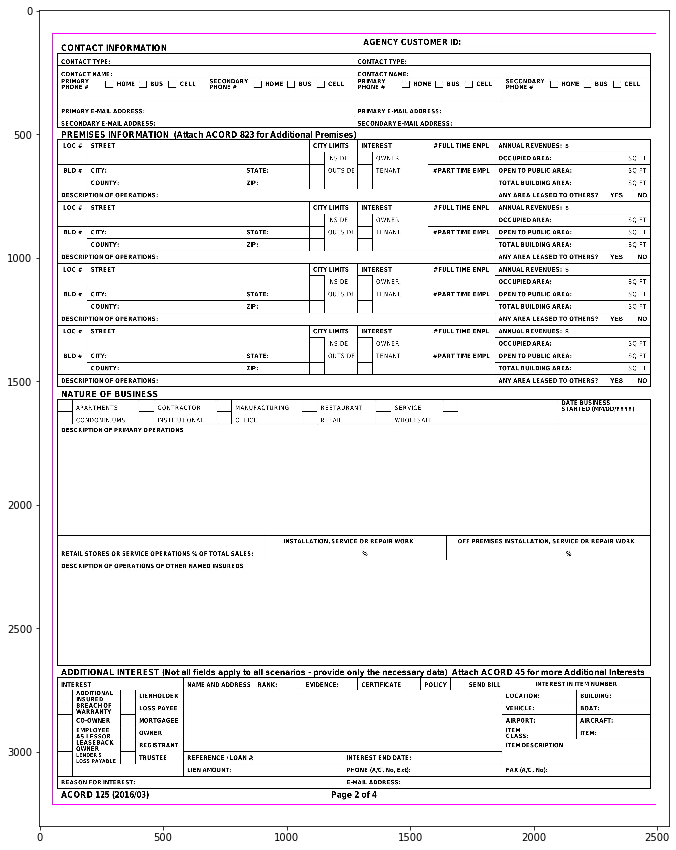

In [17]:
sec_image = cv2.imread(sample_images_path+"acord-125-sample.jpg-2.jpg")
gray_img = cv2.cvtColor(sec_image,cv2.COLOR_BGR2GRAY) # grayscale
_,thresh_img = cv2.threshold(gray_img,150,255,cv2.THRESH_BINARY_INV) # threshold
kernel_rect = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated_img = cv2.dilate(thresh_img,kernel_rect,iterations = 20) # dilate
contours_img, hierarchy_img = cv2.findContours(dilated_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours

print("about to remove all files from "+cropped_dir_path)
shutil.rmtree(cropped_dir_path)
os.mkdir(cropped_dir_path)

# for each contour found, draw a rectangle around it on original image
idx = 0
for contour in contours_img:
    idx += 1
    # get rectangle bounding contour
    [x,y,w,h] = cv2.boundingRect(contour)
    # discard areas that are too small
    if h<10 or w<10:
        continue
    # draw rectangle around contour on original image
    cv2.rectangle(sec_image,(x,y),(x+w,y+h),(255,0,255),2)
    new_img = sec_image[y:y+h, x:x+w]
    cv2.imwrite(cropped_dir_path+"/"+str(idx) + '.png', correct_image_orientation(new_img))

plt.imshow(sec_image)

In [12]:
def correct_image_orientation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    cords = np.column_stack(np.where(thres> 0))
    angle = cv2.minAreaRect(cords)[-1]
    if angle < 0:
        angle = -(180 + angle)
    else:
        angle = -angle
    rotated = ndimage.rotate(image, angle)
    return rotated